In [155]:
import sys
sys.path.append('..')
import ugent

import matplotlib.pyplot as plt
import matplotlib as mpl

In [156]:
from pyslise import Pyslise

def V(x):
    if abs(x) < 1:
        return 0
    else:
        return 30

problem = Pyslise(V, -2, 2, tolerance=1e-12)

print(problem.eigenvaluesByIndex(0, 5, (0, 1), (0, 1)))
problem.__sectorCount

[(0, 1.7590136796083102), (1, 6.96439852169896), (2, 15.33771322659843), (3, 25.99969200245505), (4, 35.32982695238706)]


15

In [170]:
from pyslise import Pyslise
from math import pi, cos
import numpy as np

def V(x):
    return 0 if abs(x) < 1 else 30

problem = Pyslise(V, -2, 2, tolerance=1e-12, jumps=[-1, 1])

print(problem.eigenvaluesByIndex(0, 50, (0, 1), (0, 1)))

[(0, 1.7589119128627198), (1, 6.964002351200032), (2, 15.336877270605676), (3, 25.998470108700115), (4, 35.3291991570333), (5, 39.79209632768733), (6, 45.83390997526608), (7, 56.7019631344595), (8, 66.62011973386691), (9, 76.70252155312625), (10, 90.24934915041558), (11, 105.2454568939543), (12, 119.71344623277105), (13, 135.69917425200012), (14, 154.38303923995704), (15, 173.82178920455954), (16, 193.34283059176275), (17, 214.67731371650484), (18, 238.2046281403159), (19, 262.3568375952049), (20, 286.9586183922928), (21, 313.4124813126921), (22, 341.7660529465953), (23, 370.7479514277186), (24, 400.4015169797654), (25, 431.8794123327732), (26, 465.07762339491984), (27, 498.9417702811339), (28, 533.6190732317881), (29, 570.0772959592989), (30, 608.1393193064434), (31, 646.911374916894), (32, 686.5914155404997), (33, 728.0081797598339), (34, 770.9491798049625), (35, 814.6424951081485), (36, 859.3101528703576), (37, 905.6738857927162), (38, 953.5052551239773), (39, 1002.1271168660943), (

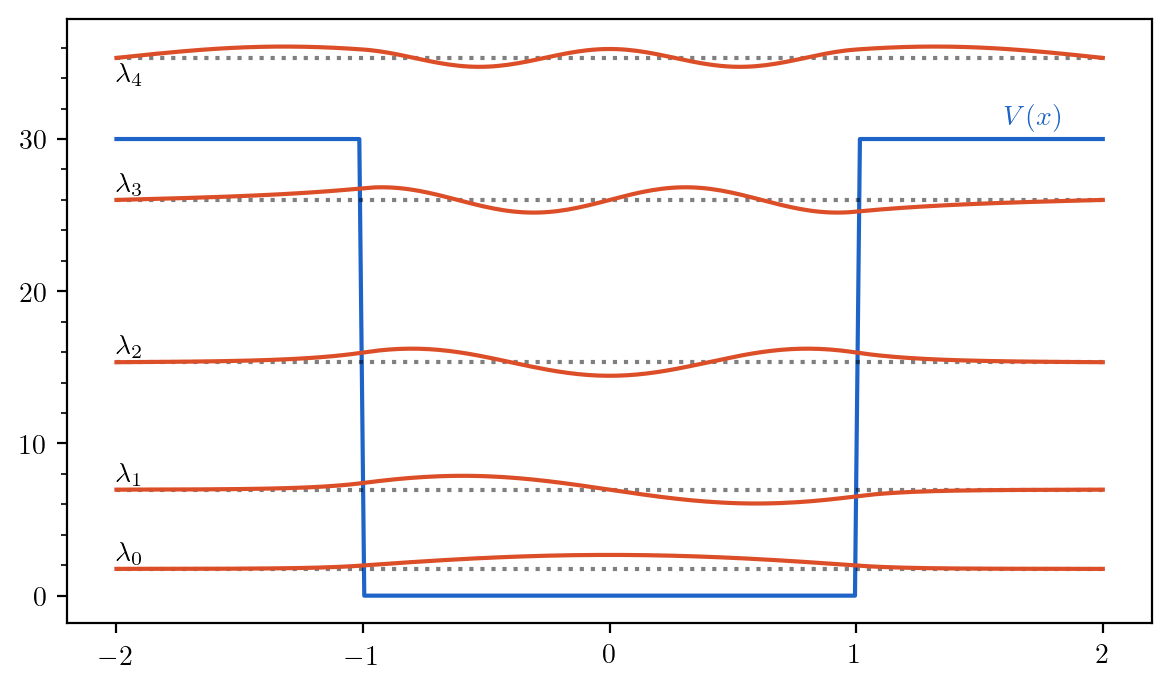

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4), dpi=200)

x = np.linspace(-2, 2, 200)
ax.plot(x, V(x), color=ugent.blauw)
ax.text(1.6, 31, "$V(x)$", color=ugent.blauw)

ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_yticks([0, 10, 20, 30, 40])
ax.set_yticks(range(0, 40, 2), minor=True)

for i, E, f in problem.eigenpairsByIndex(0, 5, (0, 1), (0, 1)):
    y = f(x)[0, :]
    ax.plot([-2, 2], [E, E], color=ugent.zwart, alpha=0.5, ls=':')
    ax.plot(x, E + y, color=ugent.rood)
    ax.text(-2, E+0.6 if i < 4 else E - 1.5, f"$\\lambda_{{{i}}}$")

plt.savefig('matslise_jumps_eigenfunctions.pdf', bbox_inches="tight")
plt.show()

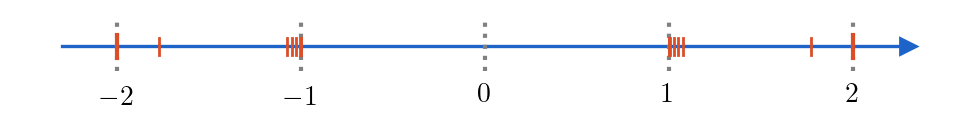

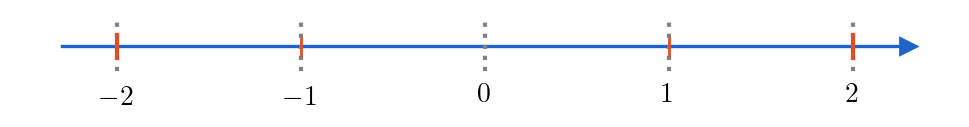

In [168]:
import matplotlib.pyplot as plt

for jumps in [False, True]:
    problem = Pyslise(V, -2, 2, tolerance=1e-12, jumps=([-1, 1] if jumps else []))

    al = .3

    fig, ax = plt.subplots(1, 1, figsize=(6, 1), dpi=200)
    ax.set_axis_off()

    ax.plot([-2-al, 2+al], [0, 0], '-', lw=1.2, c=ugent.blauw)
    ax.plot(2+al, 0, '>', ms=6, c=ugent.blauw)

    vw = .03
    ax.set_aspect(1)
    for i in [-2, -1, 0, 1, 2]:
        ax.plot([i, i], [-4.5*vw, 4.5*vw], color="gray", ls=':')
        ax.text(i, -vw*10, f'${i}$', ha="center")
    for i in [-2, 2]:
        ax.plot([i, i], [-2*vw, 2*vw], color=ugent.rood)
    for i in range(1, problem.__sectorCount):
        m = problem.__sector(i).min
        ax.plot([m, m], [-1.5*vw, 1.5*vw], color=ugent.rood, lw=1)

    plt.savefig(f'matslise_jumps_{"with" if jumps else "without"}.pdf', bbox_inches="tight")
    plt.show()

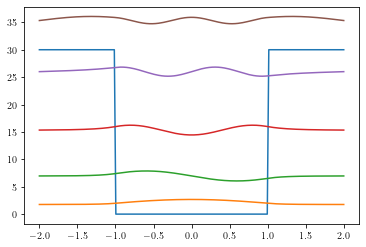

In [180]:
problem = Pyslise(V, -2, 2, tolerance=1e-12, jumps=[-1, 1])

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 2, 200)

plt.plot(x, np.vectorize(V)(x))
for i, E, f in problem.eigenpairsByIndex(0, 5, (0, 1), (0, 1)):
    plt.plot(x, E + f(x)[0,:])

array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30])